## A classification model using SVM for Salary Data
In this notebook, we will built a classification model using Support Vector Machines (SVM) to predict whether an individual's salary is above or below $50,000 based on various features such as age, occupation, and more. We will perform exploratory data analysis to gain insights into the data and preprocess it for modeling. Next, we will train an SVM model using the training data. We'll evaluate the model's performance on the testing data, fine-tune its hyperparameters and perform additional preprocessing to improve its accuracy. Overall, the goal of this notebook is to demonstrate how to build a classification model using SVM and how to optimize its performance.

## Section 1. Importing Necessary Libraries

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Section 2. Load Train and Test Dataset

In [ ]:
# TODO: Load the 'SalaryData_Train.csv' file into a pandas dataframe called train_data
train_data = pd.read_csv('SalaryData_Train.csv')

# TODO: Load the 'SalaryData_Test.csv' file into a pandas dataframe called test_data
test_data = pd.read_csv('SalaryData_Test.csv')

# TODO: Display the first 5 or 10 rows of the train_data dataframe
train_data.iloc[0:10]


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Section 3. EDA

In [ ]:
# TODO: Print the shape of the train_data dataframe
print(train_data.shape)
# TODO: Print the shape of the test_data dataframe
print(test_data.shape)
# TODO: Print the information about the train_data dataframe
print(train_data.info())
# TODO Display the summary statistics of the train_data dataframe
print(train_data.describe())
# TODO: Replace any NaN values in the train_data dataframe with 0
train_data = train_data.fillna(0)
# TODO: Print the number of NaN values in each column of the train_data dataframe
print(train_data.isna().sum())

(30161, 14)
(15060, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB
None
                age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000 

## Data Visualization

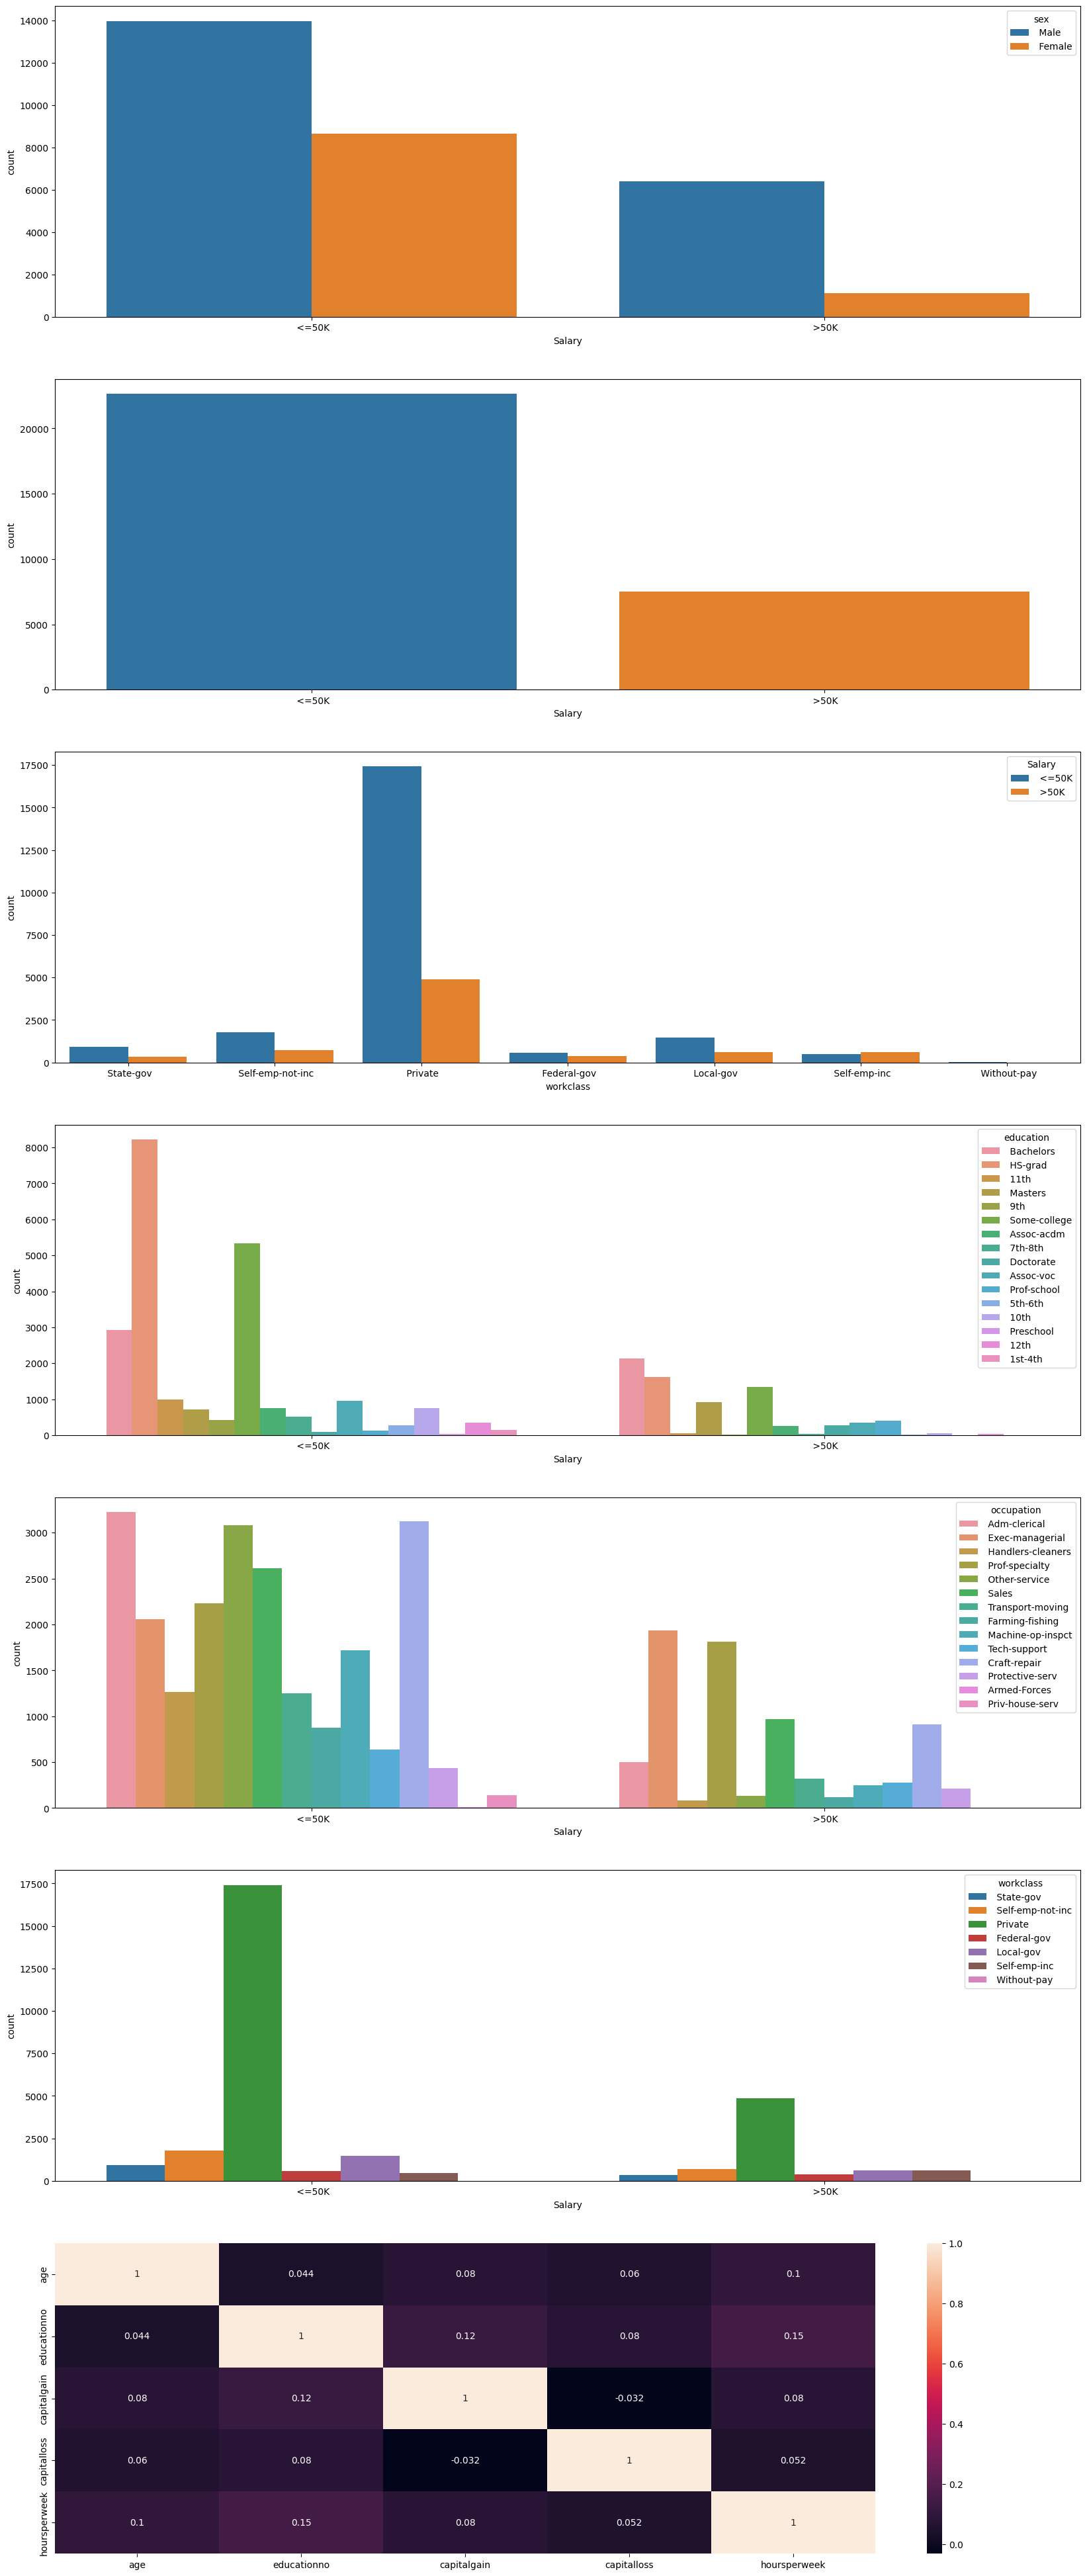

In [ ]:
# TODO: Display pairwise relationships between variables in the train_data dataframe
fig, axs = plt.subplots(7, 1, figsize=(20, 50))
# TODO: Plot the average count of males and females in each salary group using a bar plot
sns.countplot(x='Salary',  hue='sex', data=train_data, ax=axs[0])
# TODO: Plot the count of each salary group in the train_data dataframe using a countplot
sns.countplot(x='Salary', data=train_data, ax=axs[1])
# TODO: Plot the count of each salary group in each workclass using a bar plot
sns.countplot(x='workclass', hue='Salary', data=train_data, ax=axs[2])
# TODO: Plot the average count of each education level in each salary group using a bar plot
sns.countplot(x='Salary', hue='education', data=train_data, ax=axs[3])
# TODO: Plot the average count of each occupation in each salary group using a bar plot
sns.countplot(x='Salary', hue='occupation', data=train_data, ax=axs[4])
# TODO: Plot the average count of each workclass in each salary group using a bar plot
sns.countplot(x='Salary', hue='workclass', data=train_data, ax=axs[5])
# TODO: Plot the correlation between variables in the train_data dataframe using a heatmap
corr = train_data.corr()
sns.heatmap(corr, annot=True, ax=axs[6])
plt.show()

###  Outliers Detection

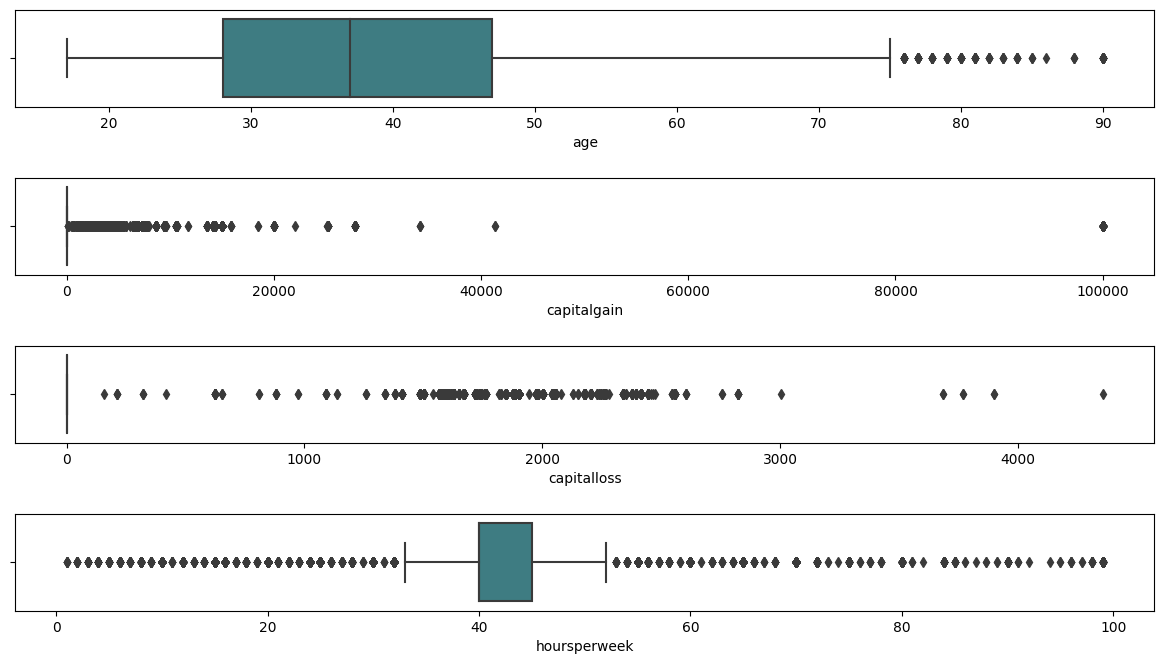

In [ ]:
outlier1 = train_data.copy()
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier1,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier1,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier1,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier1,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

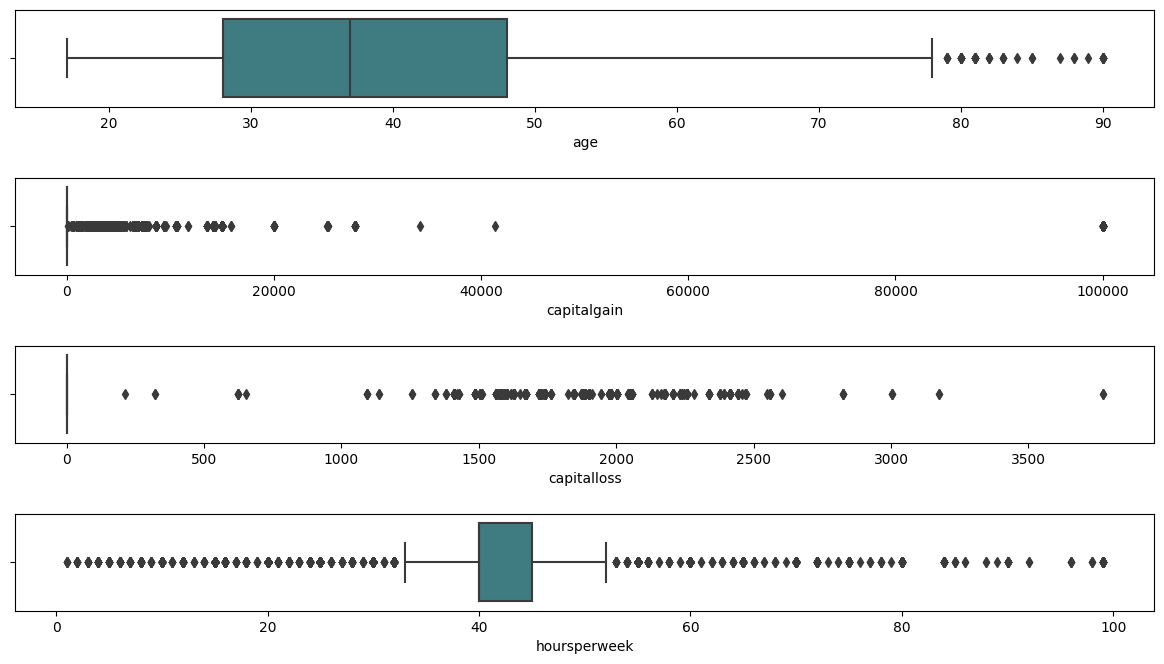

In [ ]:
outlier2 = test_data.copy()
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier2,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier2,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier2,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier2,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

#### There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

## Section 4. Data Preprocessing

In [ ]:
# TODO: Create a LabelEncoder object
l = LabelEncoder()
# TODO: Use the LabelEncoder object to transform these columns of the train_data dataframe:
# workclass, education, maritalstatus, occupation, relationship, race, sex, native
array = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
for i in array:
    train_data[i] = l.fit_transform(train_data[i])
# TODO: Display the modified train_data dataframe
print(train_data)
# TODO: Use a list comprehension to replace the values in the 'Salary' column of
# the train_data dataframe with 0 if the value is<=50K' and 1 if the value is '>50K'
train_data['Salary'] = [0 if x == ' <=50K' else 1 for x in train_data['Salary']]
# TODO: Do the same preprocessing to test data
for i in array:
    test_data[i] = l.fit_transform(test_data[i])
test_data['Salary'] = [0 if x == ' <=50K' else 1 for x in test_data['Salary']]

       age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
30156   27          2          7           12              2          12   
30157   40          2         11            9              2           6   
30158   58          2         11            9              6           0   
30159   22          2         11            9              4           0   
30160   52          3         11            9              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0            

## Section 5. Model Building

In [ ]:
# TODO: Create X_train by dropping the 'Salary' column from the train_data dataframe
X_train = train_data.drop('Salary', axis=1)
# TODO: Create y_train by selecting only the 'Salary' column from the train_data dataframe
y_train = train_data['Salary']
# TODO: Create X_test by dropping the 'Salary' column from the test_data dataframe
X_test = test_data.drop('Salary', axis=1)
# TODO: Create y_test by selecting only the 'Salary' column from the test_data dataframe
y_test = test_data['Salary']
# TODO: Print the shape of X_train, y_train, X_test, and y_test dataframes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# TODO: Create a Support Vector Classifier object
svc = SVC()

(30161, 13)
(30161,)
(15060, 13)
(15060,)


## Section 6. Model Training | Testing | Evaluation - SVM Model

In [ ]:
# TODO: Train the svc model with X_train and y_train
svc.fit(X_train, y_train)
# TODO: Use the svc model to predict the values of y for X_test and store the result in y_pred
y_pred = svc.predict(X_test)
# TODO: Print the confusion matrix of y_test and y_pred
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)
print('\n')
# TODO: Print the classification report of y_test and y_pred
classificationReport = classification_report(y_test, y_pred)
print(classificationReport)
print('\n')
# TODO: Print the training accuracy of the svc model with X_train and y_train
train_accuracy = svc.score(X_train, y_train)
print(train_accuracy)
print('\n')
# TODO: Print the testing accuracy of the svc model with X_test and y_test
test_accuracy = svc.score(X_test, y_test)
print(test_accuracy)


[[10997   363]
 [ 2703   997]]


              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060



0.7960279831570571


0.7964143426294821


##Section 7. Handling Imbalance Data

In [ ]:
# TODO: Print the count of each unique value in the 'Salary' column of the train_data dataframe
print(train_data['Salary'].value_counts())
print('\n')
# TODO: Create a SMOTE object
smote = SMOTE()
# TODO: Use  the SMOTE object to resample the X_train and y_train dataframes
# and store the result in X_resampled and y_resampled, respectively
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# TODO: Display the resampled X_resampled dataframe
print(X_resampled)
print('\n')
# TODO: Display the resampled y_resampled dataframe
print(y_resampled)
print('\n')
# TODO: Print the count of each unique value in the resampled y_resampled dataframe
print(y_resampled.value_counts())
print('\n')


0    22653
1     7508
Name: Salary, dtype: int64


       age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
45301   52          2         10           16              2           9   
45302   39          0         11            9              2           0   
45303   34          2         15           10              2           2   
45304   35          2         11            9              2          11   
45305   44          2         15           10              0          11   

       relationship  race  sex  capi

* 0.0001 < gamma < 10
* 0.1 < C < 100 -- gamma--decision boundary shape (Larger gamma value-overfitting of the model)
* C parameter adds a penalty for each misclassified data point

In [ ]:
# TODO: Create a Support Vector Classifier object,
# try to change it's parameters for better accuracy
svc = SVC(kernel='rbf', C=60, gamma=0.03)
# TODO: Train the model with resampled X and y dataframes as arguments
svc.fit(X_resampled, y_resampled)
# TODO: Use the model to predict the values of y for X_test and store the result in y_pred
y_pred = svc.predict(X_test)
# TODO: Print the confusion matrix of y_test and y_pred
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)
print('\n')
# TODO: Print the classification report of y_test and y_pred
classificationReport = classification_report(y_test, y_pred)
print(classificationReport)
print('\n')
# TODO: Print the training accuracy of the model with resampled X and y dataframes as arguments
train_accuracy = svc.score(X_resampled, y_resampled)
print(train_accuracy)
print('\n')
# TODO: Print the testing accuracy of the model with X_test and y_test as arguments
test_accuracy = svc.score(X_test, y_test)
print(test_accuracy)

[[9555 1805]
 [1211 2489]]


              precision    recall  f1-score   support

           0       0.89      0.84      0.86     11360
           1       0.58      0.67      0.62      3700

    accuracy                           0.80     15060
   macro avg       0.73      0.76      0.74     15060
weighted avg       0.81      0.80      0.80     15060



0.9423255197987022


0.799734395750332


## Section 8. Feature Selection

In [ ]:
def select_features(X_train, y_train, X_test):
    # TODO: Create a SelectKBest object with chi2 as the score function
    skb = SelectKBest(score_func=chi2)
    # TODO: Fit the X_train and y_train dataframes using the SelectKBest object
    skb.fit(X_train, y_train)
    # TODO: Transform the X_train dataframe using the SelectKBest object and store the result in X_train_fs
    X_train_fs = skb.transform(X_train)
    # TODO: Transform the X_test dataframe using the SelectKBest object and store the result in X_test_fs
    X_test_fs = skb.transform(X_test)
    # TODO: Return the X_train_fs, X_test_fs, and SelectKBest object
    return X_train_fs, X_test_fs, skb


Feature 0: 7927.146247
Feature 1: 4.061261
Feature 2: 264.815807
Feature 3: 2178.317438
Feature 4: 982.227659
Feature 5: 218.597378
Feature 6: 3435.382731
Feature 7: 29.339535
Feature 8: 459.219298
Feature 9: 74124662.376269
Feature 10: 1258785.769299
Feature 11: 5569.194066
Feature 12: 16.707320


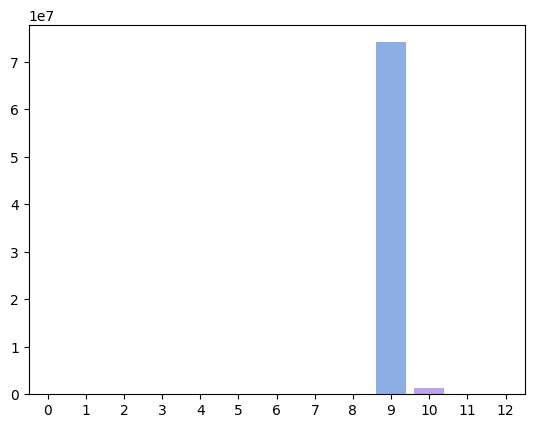

In [ ]:
# TODO: Call the select_features() function and store the result in X_fs, X_test_fs, and fs
X_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# TODO: print the corresponding score of each feature using scores_ attribute of the fs object
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# TODO: Create a bar plot of the scores
sns.barplot(x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], y=fs.scores_)
# TODO: Display the bar plot
plt.show()
# TODO Pick out the most relevant features
#feature 9 and 10 has the most scoores so we pick up them.
#capitalgain and capitalloss

In [ ]:
# TODO: Create a copy of the train_data dataframe called train_data_copy
train_data_copy = train_data.copy()
# TODO: Drop the columns with irrelevant features from the train_data_copy dataframe
train_data_copy = train_data_copy.drop(['age', 'workclass', 'education', 'educationno', 'maritalstatus', 'occupation',
                                        'relationship', 'race', 'sex', 'hoursperweek', 'native'],axis=1)
# TODO: Display the train_data_copy dataframe
print(train_data_copy)
# TODO: Do the same to the test_data
test_data_copy = test_data.copy()
test_data_copy = test_data_copy.drop(['age', 'workclass', 'education', 'educationno', 'maritalstatus', 'occupation',
                     'relationship', 'race', 'sex', 'hoursperweek', 'native'],axis=1)
print(test_data_copy)

       capitalgain  capitalloss  Salary
0             2174            0       0
1                0            0       0
2                0            0       0
3                0            0       0
4                0            0       0
...            ...          ...     ...
30156            0            0       0
30157            0            0       1
30158            0            0       0
30159            0            0       0
30160        15024            0       1

[30161 rows x 3 columns]
       capitalgain  capitalloss  Salary
0                0            0       0
1                0            0       0
2                0            0       1
3             7688            0       1
4                0            0       0
...            ...          ...     ...
15055            0            0       0
15056            0            0       0
15057            0            0       0
15058         5455            0       0
15059            0            0       1

[15060 rows x

## Section 9. Model Training with Highly Relevant Features


In [ ]:
# TODO: Repeat all the steps in Section 6 with the new dataset that has irrelevant features removed
X_train = train_data_copy.drop('Salary', axis=1)
y_train = train_data_copy['Salary']
X_test = test_data_copy.drop('Salary', axis=1)
y_test = test_data_copy['Salary']
svc = SVC()
# TODO: Train the svc model with X_train and y_train
svc.fit(X_train, y_train)
# TODO: Use the svc model to predict the values of y for X_test and store the result in y_pred
y_pred = svc.predict(X_test)
# TODO: Print the confusion matrix of y_test and y_pred
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)
print('\n')
# TODO: Print the classification report of y_test and y_pred
classificationReport = classification_report(y_test, y_pred)
print(classificationReport)
print('\n')
# TODO: Print the training accuracy of the svc model with X_train and y_train
train_accuracy = svc.score(X_train, y_train)
print(train_accuracy)
print('\n')

# TODO: Print the testing accuracy of the svc model with X_test and y_test
test_accuracy = svc.score(X_test, y_test)
print(test_accuracy)

[[10997   363]
 [ 2703   997]]


              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060



0.7960279831570571


0.7964143426294821
